In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import *


In [2]:
MISSING = -9999

In [3]:
df = pd.read_csv("../data/processed/data_encoded.csv")

In [4]:
df.shape

(39325, 274)

In [5]:
df_train = df[df["test"] == 0].drop(columns=["test"]).set_index("id")
df_test = df[df["test"] == 1].drop(columns=["test"]).set_index("id")

In [6]:
X = df_train.drop(columns=["satisfied"])
y = df_train["satisfied"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1001)
# X_train_id, X_test_id, _, _ = train_test_split(X_id, y, test_size=0.30, random_state=1001)

In [8]:
X_final = df_test.drop(columns=["satisfied"])

In [9]:
X_train.shape

(21056, 271)

In [10]:
X_test.shape

(9024, 271)

In [11]:
X_final.shape

(9245, 271)

In [16]:
params = {
    'subsample': 1.0,
    'scale_pos_weight': 1.0,
    'max_depth': 5,
    'colsample_bytree': 0.5,
    'colsample_bynode': 1.0,
    'colsample_bylevel': 0.5
}

In [14]:
categorical = ['v17', 'v20', 'v25', 'v78', 'v154', 'v155', 'v161', 'cntry']
categorical += ['v70', 'v71', 'v72', 'v73', 'v102', 'v103', 
                           'v158', 'v159', 'v160', 'v163', 'v164', 
                           'v169', 'v170', 'v190', 'v191',
                          'v216', 'v231']

In [38]:
final_model = CatBoostClassifier(iterations=500,
                                learning_rate=0.1,
                                cat_features=categorical,
                                depth=4,
                                loss_function='CrossEntropy')

In [39]:
final_model.fit(X_train, y_train)

0:	learn: 0.6466023	total: 66.9ms	remaining: 33.4s
1:	learn: 0.6079826	total: 133ms	remaining: 33.2s
2:	learn: 0.5748173	total: 195ms	remaining: 32.2s
3:	learn: 0.5511648	total: 247ms	remaining: 30.7s
4:	learn: 0.5288374	total: 316ms	remaining: 31.3s
5:	learn: 0.5102940	total: 369ms	remaining: 30.4s
6:	learn: 0.4961993	total: 430ms	remaining: 30.3s
7:	learn: 0.4870724	total: 478ms	remaining: 29.4s
8:	learn: 0.4783696	total: 547ms	remaining: 29.9s
9:	learn: 0.4691951	total: 592ms	remaining: 29s
10:	learn: 0.4637998	total: 647ms	remaining: 28.8s
11:	learn: 0.4576706	total: 693ms	remaining: 28.2s
12:	learn: 0.4529355	total: 783ms	remaining: 29.3s
13:	learn: 0.4485998	total: 833ms	remaining: 28.9s
14:	learn: 0.4453408	total: 880ms	remaining: 28.5s
15:	learn: 0.4417472	total: 925ms	remaining: 28s
16:	learn: 0.4396675	total: 983ms	remaining: 27.9s
17:	learn: 0.4375509	total: 1.04s	remaining: 27.9s
18:	learn: 0.4348403	total: 1.09s	remaining: 27.6s
19:	learn: 0.4334303	total: 1.14s	remaining:

162:	learn: 0.3901686	total: 11.1s	remaining: 23s
163:	learn: 0.3900021	total: 11.2s	remaining: 22.9s
164:	learn: 0.3898915	total: 11.2s	remaining: 22.8s
165:	learn: 0.3897911	total: 11.3s	remaining: 22.7s
166:	learn: 0.3895181	total: 11.3s	remaining: 22.6s
167:	learn: 0.3894496	total: 11.4s	remaining: 22.6s
168:	learn: 0.3892497	total: 11.5s	remaining: 22.5s
169:	learn: 0.3890213	total: 11.5s	remaining: 22.4s
170:	learn: 0.3888929	total: 11.6s	remaining: 22.3s
171:	learn: 0.3886956	total: 11.8s	remaining: 22.4s
172:	learn: 0.3884716	total: 11.8s	remaining: 22.4s
173:	learn: 0.3882932	total: 11.9s	remaining: 22.3s
174:	learn: 0.3882372	total: 11.9s	remaining: 22.2s
175:	learn: 0.3879969	total: 12s	remaining: 22.1s
176:	learn: 0.3878271	total: 12.1s	remaining: 22s
177:	learn: 0.3876432	total: 12.1s	remaining: 21.9s
178:	learn: 0.3875706	total: 12.1s	remaining: 21.8s
179:	learn: 0.3874562	total: 12.2s	remaining: 21.7s
180:	learn: 0.3874182	total: 12.3s	remaining: 21.6s
181:	learn: 0.3872

321:	learn: 0.3684384	total: 20.8s	remaining: 11.5s
322:	learn: 0.3682680	total: 20.8s	remaining: 11.4s
323:	learn: 0.3682648	total: 20.9s	remaining: 11.3s
324:	learn: 0.3682198	total: 20.9s	remaining: 11.3s
325:	learn: 0.3681126	total: 21s	remaining: 11.2s
326:	learn: 0.3679016	total: 21s	remaining: 11.1s
327:	learn: 0.3678215	total: 21.1s	remaining: 11s
328:	learn: 0.3677037	total: 21.1s	remaining: 11s
329:	learn: 0.3676832	total: 21.2s	remaining: 10.9s
330:	learn: 0.3675791	total: 21.2s	remaining: 10.8s
331:	learn: 0.3674033	total: 21.3s	remaining: 10.8s
332:	learn: 0.3671909	total: 21.4s	remaining: 10.7s
333:	learn: 0.3670163	total: 21.4s	remaining: 10.6s
334:	learn: 0.3669358	total: 21.5s	remaining: 10.6s
335:	learn: 0.3667160	total: 21.5s	remaining: 10.5s
336:	learn: 0.3666293	total: 21.6s	remaining: 10.4s
337:	learn: 0.3664569	total: 21.6s	remaining: 10.4s
338:	learn: 0.3663453	total: 21.7s	remaining: 10.3s
339:	learn: 0.3662424	total: 21.7s	remaining: 10.2s
340:	learn: 0.366107

481:	learn: 0.3513469	total: 29.2s	remaining: 1.09s
482:	learn: 0.3512271	total: 29.2s	remaining: 1.03s
483:	learn: 0.3511939	total: 29.3s	remaining: 967ms
484:	learn: 0.3511835	total: 29.3s	remaining: 907ms
485:	learn: 0.3511015	total: 29.4s	remaining: 846ms
486:	learn: 0.3510219	total: 29.4s	remaining: 785ms
487:	learn: 0.3508579	total: 29.5s	remaining: 724ms
488:	learn: 0.3507509	total: 29.5s	remaining: 664ms
489:	learn: 0.3507155	total: 29.6s	remaining: 603ms
490:	learn: 0.3504708	total: 29.6s	remaining: 543ms
491:	learn: 0.3503485	total: 29.7s	remaining: 482ms
492:	learn: 0.3502651	total: 29.7s	remaining: 422ms
493:	learn: 0.3500473	total: 29.8s	remaining: 361ms
494:	learn: 0.3499775	total: 29.8s	remaining: 301ms
495:	learn: 0.3498028	total: 29.9s	remaining: 241ms
496:	learn: 0.3497792	total: 29.9s	remaining: 181ms
497:	learn: 0.3497521	total: 30s	remaining: 120ms
498:	learn: 0.3496337	total: 30s	remaining: 60.2ms
499:	learn: 0.3495441	total: 30.1s	remaining: 0us


In [40]:
y_pred_train = final_model.predict(X_train)
y_prob_train = final_model.predict_proba(X_train)[:,1]

In [41]:
y_pred_test = final_model.predict(X_test)
y_prob_test = final_model.predict_proba(X_test)[:,1]

In [42]:
roc_auc_score(y_test, y_prob_test), roc_auc_score(y_train, y_prob_train)

(0.8891280429373094, 0.9259094783111725)

No handles with labels found to put in legend.


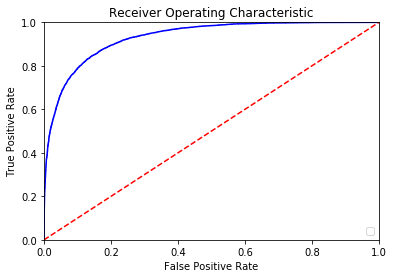

In [22]:
fpr, tpr, threshold = roc_curve(y_train, y_prob_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

No handles with labels found to put in legend.


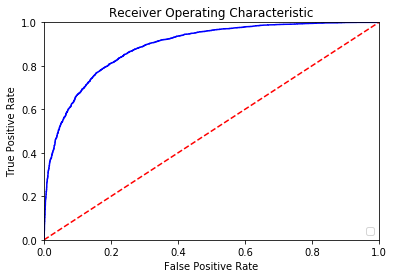

In [23]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_test)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
(0.8901941061759845, 0.9386534084249205)  #5

(0.8901941061759845, 0.9386534084249205)

In [25]:
(0.8901553362068626, 0.9203028581243273) #4

(0.8901553362068626, 0.9203028581243273)

In [26]:
(0.8896688507329076, 0.9068574909384938) #3

(0.8896688507329076, 0.9068574909384938)

In [27]:
(0.8879588067229542, 0.8971857360901431) #2

(0.8879588067229542, 0.8971857360901431)

In [28]:
y_pred_final = final_model.predict(X_final)
y_prob_final = final_model.predict_proba(X_final)[:,1]

In [29]:
df_result = pd.DataFrame(y_prob_final, columns=["Predicted"])

In [30]:
df_result["Id"] = df_test.index

In [31]:
df_result[["Id", "Predicted"]]

,Id,Predicted
0,14061,0.064110
1,16467,0.107665
2,25725,0.930857
3,9100,0.860247
4,32597,0.567849
...,...,...
9240,31430,0.920340
9241,3876,0.675523
9242,20710,0.732794
9243,26015,0.713012


In [32]:
df_result[["Id", "Predicted"]].to_csv("../data/result/result_03_05_submission2.csv", index=False)

In [33]:
y_prob_test

array([0.27419066, 0.2696268 , 0.05794397, ..., 0.24994688, 0.07023645,
       0.06697793], dtype=float32)

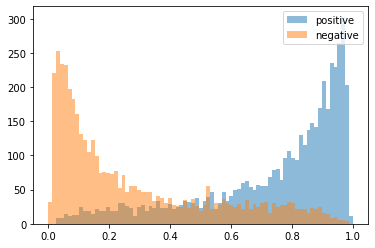

In [34]:
pos = y_prob_test[y_test.astype(bool).values]
neg = y_prob_test[~(y_test.astype(bool).values)]

bins = np.linspace(0, 1, 80)

plt.hist(pos, bins, alpha=0.5, label='positive')
plt.hist(neg, bins, alpha=0.5, label='negative')
plt.legend(loc='upper right')
plt.show()

In [348]:
df_original = pd.read_csv("../data/interim/train.csv")

/Users/tingwei758/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,6,10,12,18,24,35,56,57,65,85,86,87,88,89,98,99,100,105,124,125,126,127,128,130,131,133,166,171,172,192,193,194,195,204,205,206,207,228,229,230,240,256,257,258,259,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [374]:
df_ori = df_original.set_index("id").loc[X_train.index]

In [375]:
df_ori["pred"] = y_pred_train
df_ori["prob"] = y_prob_train

In [376]:
df_ori["correct"] = (df_ori["satisfied"] == df_ori["pred"]).astype(int)

In [377]:
df_ori

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v266,v267,v268,v269,v270,cntry,satisfied,pred,prob,correct
id,,,,,,,,,,,,,,,,,,,,,
16436,7,2,44,12040,.a,1,2,2,2,1,...,.a,.a,.a,NaN,NaN,NO,1,1.0,0.865028,1
5416,8,1,49,12020,.a,1,1,2,2,1,...,.a,.a,.a,.a,.a,FI,1,1.0,0.984691,1
39101,1,2,72,13060,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,PT,0,0.0,0.035139,1
28286,5,2,71,11030,.a,2,2,2,2,1,...,.a,.a,.a,.a,NaN,GB,0,0.0,0.110533,1
3419,5,2,73,11080,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,IE,0,0.0,0.103392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,2,71,11010,11010,2,2,2,2,1,...,.a,.a,.a,.a,NaN,AT,0,0.0,0.069247,1
16426,2,2,57,15040,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,HU,0,0.0,0.120433,1
14088,0,2,36,11050,11050,2,1,2,2,1,...,2010,.a,.a,.a,NaN,FR,0,0.0,0.454509,1


In [353]:
temp = df_ori.groupby("cntry").agg({"satisfied": ["mean", "count"], "correct": ["mean"]})
temp

satisfied         correct
           mean count      mean
cntry                          
AT     0.565036   961  0.862643
BE     0.750000     4  1.000000
CH     0.730178   845  0.871006
CZ     0.381435  1185  0.854008
DE     0.607143  1652  0.831114
DK     0.813760   843  0.920522
EE     0.358156  1128  0.836879
ES     0.458969  1048  0.818702
FI     0.724826  1152  0.863715
FR     0.399236  1047  0.812798
GB     0.509646  1244  0.845659
HU     0.240000   950  0.874737
IE     0.453210  1293  0.813612
IL     0.571530  1405  0.839146
LT     0.263993  1197  0.878864
NL     0.633523  1056  0.856061
NO     0.712435   772  0.869171
PL     0.483982   874  0.839817
PT     0.271429   700  0.872857
SE     0.692383  1024  0.865234
SI     0.437870   676  0.823964

In [354]:
hapiness = temp["satisfied"]["mean"]
correctness = temp["correct"]["mean"]
size = temp["satisfied"]["count"]

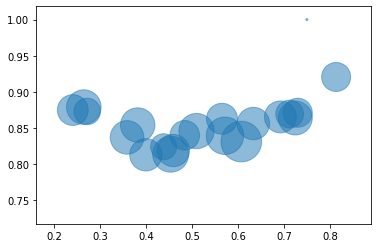

In [355]:
plt.scatter(hapiness, correctness, s=size, alpha=0.5)

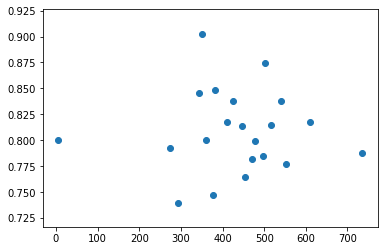

In [267]:
plt.scatter(size, correctness)

In [268]:
temp[temp["correct"]["mean"] < 0.8]

satisfied         correct
           mean count      mean
cntry                          
CZ     0.413655   498  0.785141
DE     0.599185   736  0.788043
EE     0.341004   478  0.799163
ES     0.521186   472  0.781780
FR     0.430769   455  0.764835
IE     0.503623   552  0.777174
PL     0.484043   376  0.747340
PT     0.318493   292  0.739726
SI     0.364964   274  0.791971

In [269]:
bad = temp[(temp["satisfied"]["mean"] > 0.3) & (temp["satisfied"]["mean"] < 0.6)].index

In [272]:
bad_ind = df_ori[df_ori["cntry"].isin(bad)].index

In [273]:
df_train = df[df["test"] == 0].drop(columns=["test"]).set_index("id")

In [276]:
df_train = df_train.loc[bad_ind]

In [277]:
X = df_train.drop(columns=["satisfied"])
y = df_train["satisfied"]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1001)
# X_train_id, X_test_id, _, _ = train_test_split(X_id, y, test_size=0.30, random_state=1001)

params = {
    'subsample': 1.0,
    'scale_pos_weight': 1.0,
    'max_depth': 2,
    'colsample_bytree': 0.5,
    'colsample_bynode': 1.0,
    'colsample_bylevel': 0.5
}

final_model = xgb.XGBClassifier(
    learning_rate=0.1,
    objective='binary:logistic',
    silent=True, 
    missing=MISSING,
    nthread=8,
    **params
    )


final_model.fit(X_train, y_train)

y_pred_train = final_model.predict(X_train)
y_prob_train = final_model.predict_proba(X_train)[:,1]

y_pred_test = final_model.predict(X_test)
y_prob_test = final_model.predict_proba(X_test)[:,1]

In [285]:
roc_auc_score(y_test, y_prob_test), roc_auc_score(y_train, y_prob_train)

(0.8755794913603105, 0.8904912771560237)

In [287]:
df_ori2 = df_original.set_index("id").loc[X_test.index]

In [288]:
df_ori2["pred"] = y_pred_test
df_ori2["prob"] = y_prob_test

In [289]:
df_ori2["correct"] = (df_ori2["satisfied"] == df_ori2["pred"]).astype(int)

In [290]:
df_ori2

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v266,v267,v268,v269,v270,cntry,satisfied,pred,prob,correct
id,,,,,,,,,,,,,,,,,,,,,
23751,3,2,26,11080,.a,1,2,2,2,1,...,2011,.a,.a,.a,.a,IE,1,1.0,0.861591,1
25617,2,2,47,11010,11010,1,2,2,2,1,...,.a,.a,.a,.a,NaN,AT,1,0.0,0.248110,0
18832,5,2,35,41030,.a,2,2,2,2,2,...,.a,.a,.a,.a,NaN,GB,0,0.0,0.058236,1
12235,9,2,33,15020,.a,2,1,2,2,1,...,.a,.a,NaN,NaN,NaN,CZ,1,1.0,0.863148,1
22091,0,3,54,11080,.a,2,2,2,2,1,...,1988,.a,.a,.a,.a,IE,1,1.0,0.757092,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23529,1,2,58,13070,13990,1,2,1,2,1,...,.a,.a,.a,.a,.a,ES,0,0.0,0.428250,1
2441,0,2,47,43000,.a,1,2,2,2,2,...,.a,.a,.a,.a,.a,PT,0,1.0,0.637797,0
14431,0,3,61,13060,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,PT,0,0.0,0.210856,1


In [291]:
temp = df_ori2.groupby("cntry").agg({"satisfied": ["mean", "count"], "correct": ["mean"]})
temp

satisfied         correct
           mean count      mean
cntry                          
AT     0.533835   133  0.834586
BE     0.500000     2  1.000000
CZ     0.356061   132  0.810606
DE     0.580357   224  0.776786
EE     0.324841   157  0.821656
ES     0.576923   130  0.815385
FR     0.421053   152  0.789474
GB     0.557047   149  0.825503
IE     0.480769   156  0.794872
PL     0.491379   116  0.732759
PT     0.298851    87  0.770115
SI     0.379310    87  0.793103

In [ ]:
hapiness = temp["satisfied"]["mean"]
correctness = temp["correct"]["mean"]
size = temp["satisfied"]["count"]

In [ ]:
plt.scatter(hapiness, correctness, s=size, alpha=0.5)

In [ ]:
plt.scatter(size, correctness)

In [ ]:
temp[temp["correct"]["mean"] < 0.8]